In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
df_e6 = pd.read_csv('results/1000000block_1frac_results.csv')
df_e7 = pd.read_csv('results/10000000block_1frac_results.csv')
df_e5 = pd.read_csv('results/100000block_1frac_results.csv')
import os
if not os.path.isdir('results/plots'):
    os.mkdir('results/plots')

# Pulses per second

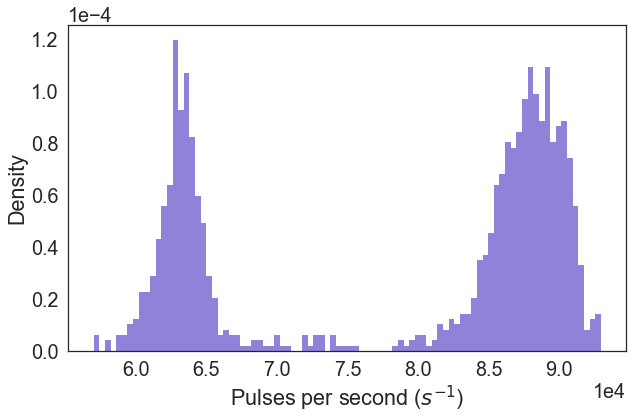

In [379]:
df = df_e5
pulses_per_second = df['total_pulses']/df['time']
fig, ax = plt.subplots( figsize=(10, 6))
sns.set_theme(style='white', font_scale=1.8)
sns.histplot(pulses_per_second, bins=90, color='slateblue', linewidth=0, stat='density')
ax.set_xlabel(r'Pulses per second ($s^{-1}$)')
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

fig.savefig('results/plots/pulses_per_second.pdf', bbox_inches='tight')


# SKR

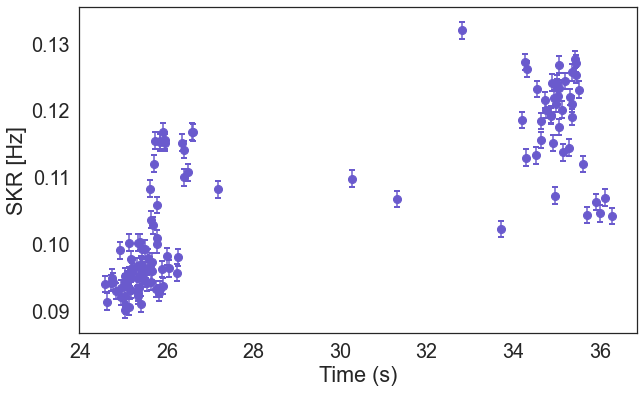

In [380]:
fig, ax = plt.subplots( figsize=(10, 6))
sns.set_theme(style='white', font_scale=1.8)
pulses_per_second = df['total_pulses']/df['time']
ax.errorbar(x=df_e6['time'], y=df_e6['SKR'],yerr=df_e6['SKR_err'], 
            label='1e6 blocks', fmt='o', color='slateblue', capsize=3, capthick=2, markersize=8)

ax.set_xlabel('Time (s)')
ax.set_ylabel('SKR [Hz]')
fig.savefig('results/plots/SKR_time.pdf', bbox_inches='tight')

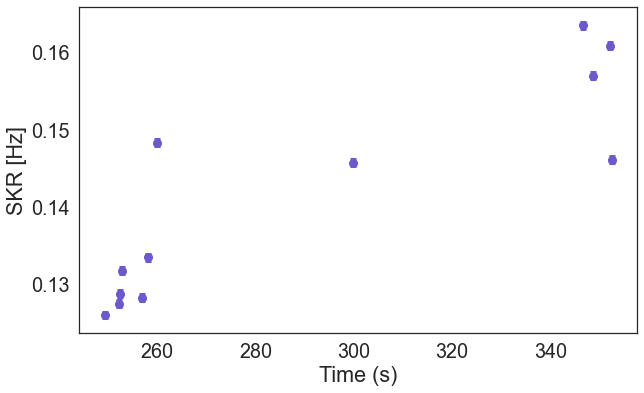

In [381]:
fig, ax = plt.subplots( figsize=(10, 6))
sns.set_theme(style='white', font_scale=1.8)
pulses_per_second = df['total_pulses']/df['time']
ax.errorbar(x=df_e7['time'], y=df_e7['SKR'],yerr=df_e7['SKR_err'], 
             fmt='o', color='slateblue', capsize=3, capthick=3, markersize=8)

ax.set_xlabel('Time (s)')
ax.set_ylabel('SKR [Hz]')
fig.savefig('results/plots/SKR_time_1e7.pdf', bbox_inches='tight')

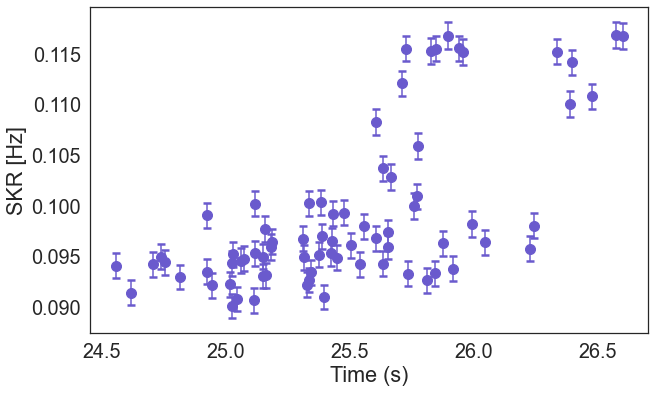

In [382]:
fig, ax = plt.subplots( figsize=(10, 6))
sns.set_theme(style='white', font_scale=1.8)
df= df_e6[-75:]
ax.errorbar(x=df['time'], y=df['SKR'],yerr=df['SKR_err'], 
            label='1e6 blocks', fmt='o', color='slateblue', capsize=4, capthick=2.5, markersize=10)

ax.set_xlabel('Time (s)')
ax.set_ylabel('SKR [Hz]')
fig.savefig('results/plots/SKR_time_zoomed.pdf', bbox_inches='tight')

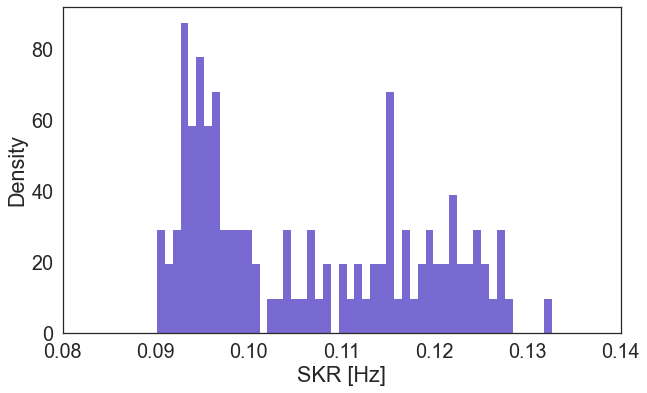

In [383]:
fig, ax = plt.subplots( figsize=(10, 6))

sns.set_theme(style='white', font_scale=1.8)
sns.histplot(x=df_e6['SKR'],label='1e blocks', color='slateblue', 
            binwidth=0.00085, linewidth=0, alpha=0.9, stat='density')
ax.set_xlim(0.08,0.14)
ax.set_xlabel('SKR [Hz]')
fig.savefig('results/plots/SKR_distro.pdf', bbox_inches='tight')

# QBER

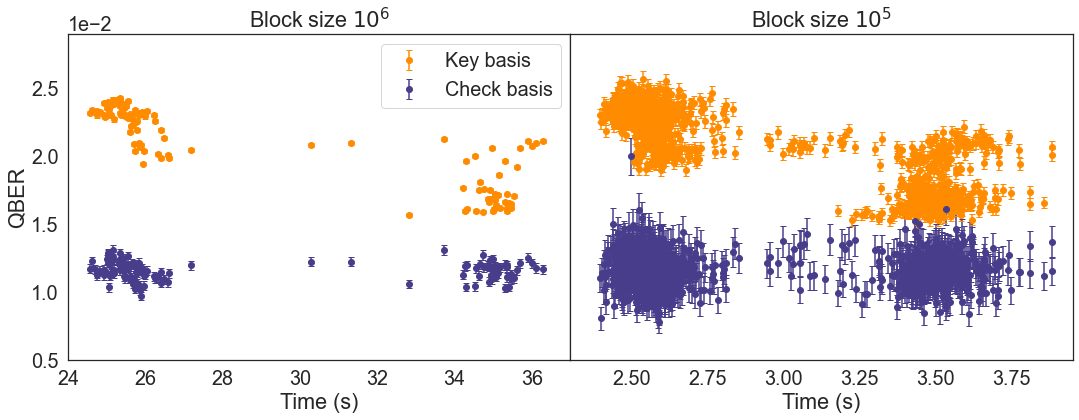

In [384]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
df = df_e6
df1= df_e5
sns.set_theme(style='white', font_scale=1.8)
ax[0].errorbar(x=df['time'], y=df['QBER_key'],yerr=df['QBER_key_err'], 
            label='Key basis', fmt='o', color='darkorange', capsize=3, capthick=1, markersize=6)
ax[0].errorbar(x=df['time'], y=df['QBER_check'],yerr=df['QBER_check_err'], 
            label='Check basis', fmt='o', color='darkslateblue', capsize=3, capthick=1, markersize=6)

ax[1].errorbar(x=df1['time'], y=df1['QBER_key'],yerr=df1['QBER_key_err'], 
            label='Key basis', fmt='o', color='darkorange', capsize=3, capthick=1, markersize=6)
ax[1].errorbar(x=df1['time'], y=df1['QBER_check'],yerr=df1['QBER_check_err'], 
            label='Check basis', fmt='o', color='darkslateblue', capsize=3, capthick=1, markersize=6)
ax[0].legend(loc='upper right')
ax[0].set_ylim(0.005, 0.029)
ax[0].set_xlim(24,37)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('QBER')
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlabel('Time (s)')
ax[1].set_yticklabels('')
ax[1].set_xlim(2.3, 3.95)
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[0].set_title (r'Block size $10^6$')
ax[1].set_title (r'Block size $10^5$')
fig.subplots_adjust(hspace=.0, wspace=0.)
fig.savefig('results/plots/QBER_time.pdf', bbox_inches='tight')

In [385]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
df = df_e6
df1= df_e5
sns.set_theme(style='white', font_scale=1.8)
bw=0.00027
sns.histplot(x=df['QBER_key'],label='Key basis', color='darkorange', ax=ax[0], 
            binwidth=bw, alpha=0.9, stat='density', linewidth=0)

sns.histplot(x=df['QBER_check'],label='Check basis',  color='darkslateblue', ax=ax[0],
            binwidth=bw, alpha=0.9, stat='density', linewidth=0)

sns.histplot(x=df1['QBER_key'],label='Key basis',  color='darkorange', ax=ax[1],
            binwidth=bw, alpha=0.9, stat='density', linewidth=0)

sns.histplot(x=df1['QBER_check'],label='Check basis', color='darkslateblue', ax=ax[1],
            binwidth=bw, alpha=0.9, stat='density', linewidth=0, err)

ax[1].legend(loc='upper right')
ax[0].set_xlabel('QBER')
ax[1].set_xlabel('QBER')
ax[1].set_yticklabels('')
ax[1].set_ylabel('')
ax[0].set_xlim(0.007, 0.0265)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[0].set_title (r'Block size $10^6$')
ax[1].set_title (r'Block size $10^5$')

fig.subplots_adjust(hspace=.0, wspace=0.)
fig.savefig('results/plots/QBER_distro.pdf', bbox_inches='tight')

SyntaxError: positional argument follows keyword argument (<ipython-input-385-1b3b3bba061c>, line 16)

In [ ]:
#peaks of the distributions
mean_6_check = df_e6['QBER_check'].mean()
mean_5_check = df_e5['QBER_check'].mean()
mean_6_key = df_e6['QBER_key'].mean()
mean_5_key = df_e5['QBER_key'].mean()
mean_6_key_a = df_e6[df_e6['QBER_key']<1.9e-2]['QBER_key'].mean()
mean_6_key_b = df_e6[(df_e6['QBER_key']>1.9e-2) & (df_e6['QBER_key']<2.2e-2)]['QBER_key'].mean()
mean_6_key_c = df_e6[df_e6['QBER_key']>2.2e-2]['QBER_key'].mean()
mean_5_key_a = df_e5[df_e5['QBER_key']<1.9e-2]['QBER_key'].mean()
mean_5_key_b = df_e5[(df_e5['QBER_key']>1.9e-2) & (df_e5['QBER_key']<2.2e-2)]['QBER_key'].mean()
mean_5_key_c = df_e5[df_e5['QBER_key']>2.2e-2]['QBER_key'].mean()
print('mean_6_key: ', mean_6_key)
print('mean_6_check: ', mean_6_check)
print('mean_6_key_a: ', mean_6_key_a)
print('mean_6_key_b: ', mean_6_key_b)
print('mean_6_key_c: ', mean_6_key_c)
print('mean_5_key: ', mean_5_key)
print('mean_5_check: ', mean_5_check)
print('mean_5_key_a: ', mean_5_key_a)
print('mean_5_key_b: ', mean_5_key_b)
print('mean_5_key_c: ', mean_5_key_c)

mean_6_key:  0.02096004490991041
mean_6_check:  0.011613920075287117
mean_6_key_a:  0.01675851095264853
mean_6_key_b:  0.020628519312321326
mean_6_key_c:  0.023361100392618146
mean_5_key:  0.020980941830162088
mean_5_check:  0.011624509361910926
mean_5_key_a:  0.016752578846817235
mean_5_key_b:  0.020599987009279317
mean_5_key_c:  0.023394788600928664
